# Wheat demo scene 

Notebook creator: Hannah Weiser & Sina Zumstein, 2022

This demo scene uses a 3D model of several wheat ears, which will be scanned by mobile laser scanning (MLS). We will use the command-line access of HELIOS++ to run the simulation, and use Python just for displaying the input XMLs and the resulting point cloud.

In [14]:
import sys, os
from pathlib import Path
from IPython.display import Code

current_folder = globals()["_dh"][0]
helios_path = str(Path(current_folder).parent)
sys.path.append(helios_path)  # add helios-plusplus directory to PATH
import pyhelios

from pyhelios.util.xmldisplayer import display_xml, find_playback_dir

# Survey
Lets's have a look at the XML files in the simulation. First, we investigate the **survey** XML file, `mls_wheat_demo.xml`:

In [15]:
os.chdir(helios_path)
Code(display_xml(r'data\surveys\demo\mls_wheat_demo.xml'), language='XML')

<document>
    <survey name="mls_arbaro_wheat" scene="data/scenes/demo/arbaro_wheat_field.xml#arbaro_wheat" platform="data/platforms.xml#tractor" scanner="data/scanners_tls.xml#riegl_vz400">
		
		<leg>
			<platformSettings x="-10" y="-10" z="0" onGround="true" movePerSec_m="3" />
			<scannerSettings active="true" pulseFreq_hz="100000" scanAngle_deg="20" scanFreq_hz="50" headRotatePerSec_deg="0.00" headRotateStart_deg="0.00" headRotateStop_deg="0.00" trajectoryTimeInterval_s="0.05" />
		</leg>
		
		<leg>
			<platformSettings x="10" y="-10" z="0" onGround="true" movePerSec_m="3" />
			<scannerSettings active="true" pulseFreq_hz="100000" scanAngle_deg="20" scanFreq_hz="50" headRotatePerSec_deg="0.00" headRotateStart_deg="0.00" headRotateStop_deg="0.00" trajectoryTimeInterval_s="0.05" />
		</leg>
		
		<leg>
			<platformSettings x="10" y="10" z="0" onGround="true" movePerSec_m="3" />
			<scannerSettings active="true" pulseFreq_hz="100000" scanAngle_deg="20" scanFreq_hz="50" headRotatePerSec_deg="0.00" headRotateStart_deg="0.00" headRotateStop_deg="0.00" trajectoryTimeInterval_s="0.05" />
		</leg>
		
		<leg>
			<platformSettings x="-10" y="10" z="0" onGround="true" movePerSec_m="3" />
			<scannerSettings active="true" pulseFreq_hz="100000" scanAngle_deg="20" scanFreq_hz="50" headRotatePerSec_deg="0.00" headRotateStart_deg="0.00" headRotateStop_deg="0.00" trajectoryTimeInterval_s="0.05" />
		</leg>
		
		<leg>
			<platformSettings x="-10" y="-10" z="0" onGround="true" movePerSec_m="3" />
			<scannerSettings active="false" pulseFreq_hz="100000" scanAngle_deg="20" scanFreq_hz="50" headRotatePerSec_deg="0.00" headRotateStart_deg="0.00" headRotateStop_deg="0.00" trajectoryTimeInterval_s="0.05" />
		</leg>
    </survey>
</document>

We can see, that there are five `leg`elements, that define the waypoints of the vehicle around the to be scanned object. Here, only `x` and `y` values are important `z` remains at 0. In total there are four lines the vehicle will drive along. The `movePerSec_m` parameter indicates the speed between these waypoints. Furthermore, we see that the `tractor` platform in `data/platforms.xml` is referenced, so let's have a look at that next:

# Platform

In [16]:
Code(display_xml(r'data\platforms.xml', 'tractor'))

<platform id="tractor" name="Tractor" type="groundvehicle" drag="0.005">
		<scannerMount x="0" y="1" z="4" rotations="local">
			<rot axis="z" angle_deg="90" />
			<rot axis="y" angle_deg="-30" />
		</scannerMount>
		
	</platform>

This is a `groundvehicle` type platform, a mobile platform which moves on the ground between the consecutive legs with a constant speed provided by the user. The `scannerMount` parameter defines the exact position of the scanner and the angle of rotation around the Z- and Y-axis. The scanner is rotated 90° around the Z-axis and -30° around the Y-axis, so that the scene in the center can be capured the best way possible. The ground vehicle tries to mimic real vehicles. It performs "smooth turns" for wide-angle curves. For narrow-angle curves, it first turns, then backs up, then finishes the turn. This can also be seen in the plot at a later point.  

# Scanner 
Next we will have a look at the scanner that is placed on the platform. Here it is the `riegl_vz400` defined in data/scanners_als.xml as shown in the survey XML.

In [17]:
Code(display_xml(r'data\scanners_tls.xml', 'riegl_vz400'))

<scanner id="riegl_vz400" name="RIEGL VZ-400" accuracy_m="0.005" beamDivergence_rad="0.0003" headRotatePerSecMax_deg="60" optics="rotating" pulseFreqs_Hz="100000,300000" pulseLength_ns="5" rangeMin_m="1.5" scanAngleMax_deg="120" scanAngleEffectiveMax_deg="50" scanFreqMin_Hz="3" scanFreqMax_Hz="120">
		
		<FWFSettings beamSampleQuality="3" />	
		<beamOrigin x="0" y="0" z="0.2">
			<rot axis="y" angle_deg="0" />
			<rot axis="z" angle_deg="0" />
			<rot axis="x" angle_deg="0" />
		</beamOrigin>
		<headRotateAxis x="0" y="0" z="1" />
		
	</scanner>

Here we can see the scanner-specific settings, for example `beamDivergence_rad`, the `accuracy` or the possible pulse frequencies (`pulseFreqs_Hz`). This scanner has an rotating beam deflector (`optics`).

# Scene
Now we will have a look at the scene, `arbaro_wheat_field.xml` in `data/scenes/demo/arbaro_wheat_field.xml`:

In [18]:
Code(display_xml(r'data/scenes/demo/arbaro_wheat_field.xml', 'arbaro_wheat'))

<scene id="arbaro_wheat" name="Arbaro wheat">
        <part>
            <filter type="objloader">
                <param type="string" key="filepath" value="data/sceneparts/basic/groundplane/groundplane.obj" />
            </filter>
            <filter type="scale">
                <param type="double" key="scale" value="100" />
            </filter>
			
        </part>
        <part>
            <filter type="objloader">
                <param type="string" key="filepath" value="data/sceneparts/arbaro/wheat.obj" />
            </filter>
            <filter type="rotate">
                <param type="rotation" key="rotation">
                    <rot axis="x" angle_deg="90" />
                </param>
            </filter>
			<filter type="scale">
                <param type="double" key="scale" value="2" />
            </filter>
        </part>
        <part>
            <filter type="objloader">
                <param type="string" key="filepath" value="data/sceneparts/arbaro/wheat.obj" />
            </filter>
            <filter type="rotate">
                <param type="rotation" key="rotation">
                    <rot axis="x" angle_deg="90" />
                </param>
            </filter>
            <filter type="translate">
                <param type="vec3" key="offset" value="1.4;2.8;0" />
            </filter>
			<filter type="scale">
                <param type="double" key="scale" value="2" />
            </filter>
        </part>
		<part>
            <filter type="objloader">
                <param type="string" key="filepath" value="data/sceneparts/arbaro/wheat.obj" />
            </filter>
            <filter type="rotate">
                <param type="rotation" key="rotation">
                    <rot axis="x" angle_deg="90" />
                </param>
            </filter>
            <filter type="translate">
                <param type="vec3" key="offset" value="1.4;1.4;0" />
            </filter>
			<filter type="scale">
                <param type="double" key="scale" value="2" />
            </filter>
        </part>
		<part>
            <filter type="objloader">
                <param type="string" key="filepath" value="data/sceneparts/arbaro/wheat.obj" />
            </filter>
            <filter type="rotate">
                <param type="rotation" key="rotation">
                    <rot axis="x" angle_deg="90" />
                </param>
            </filter>
            <filter type="translate">
                <param type="vec3" key="offset" value="1.4;0;0" />
            </filter>
			<filter type="scale">
                <param type="double" key="scale" value="2" />
            </filter>
        </part>
		<part>
            <filter type="objloader">
                <param type="string" key="filepath" value="data/sceneparts/arbaro/wheat.obj" />
            </filter>
            <filter type="rotate">
                <param type="rotation" key="rotation">
                    <rot axis="x" angle_deg="90" />
                </param>
            </filter>
            <filter type="translate">
                <param type="vec3" key="offset" value="1.4;-1.4;0" />
            </filter>
			<filter type="scale">
                <param type="double" key="scale" value="2" />
            </filter>
        </part>
		<part>
            <filter type="objloader">
                <param type="string" key="filepath" value="data/sceneparts/arbaro/wheat.obj" />
            </filter>
            <filter type="rotate">
                <param type="rotation" key="rotation">
                    <rot axis="x" angle_deg="90" />
                </param>
            </filter>
            <filter type="translate">
                <param type="vec3" key="offset" value="1.4;-2.8;0" />
            </filter>
			<filter type="scale">
                <param type="double" key="scale" value="2" />
            </filter>
        </part>
		<part>
            <filter type="objloader">
                <param type="string" key="filepa

Here we see two objects, which compose the scene: the `groundplane.obj` and the `wheat.obj`. To load it we use the `objloader` filter and give the the relative path to the file in the `filepath`parameter. 
The same object (the wheat plant) is placed in the scene 15 times. Using the `translate` filter, it is positioned in three columns and five rows to form a wheat field.

# Executing the Simulation 
Next, we will run the simulation. In Jupyter Notebooks, we can run external commands with the !command syntax, but you can also just run it from the command line.

In [19]:
!"run/helios.exe" data/surveys/demo/mls_wheat_demo.xml

HELIOS++ VERSION 1.1.1

CWD: "D:\helios"
seed: AUTO
surveyPath: "data/surveys/demo/mls_wheat_demo.xml"
assetsPath: "assets/"
outputPath: "output/"
writeWaveform: 0
calcEchowidth: 0
fullWaveNoise: 0
splitByChannel: 0
parallelization: 1
njobs: 0
chunkSize: 32
warehouseFactor: 4
platformNoiseDisabled: 0
legNoiseDisabled: 0
rebuildScene: 0
lasOutput: 0
las10: 0
fixedIncidenceAngle: 0
gpsStartTime: 
kdtType: 4
kdtJobs: 0
kdtGeomJobs: 0
sahLossNodes: 32

xmlDocFilename: mls_wheat_demo.xml
xmlDocFilePath: data/surveys/demo
xmlDocFilename: scanners_tls.xml
xmlDocFilePath: data
Using default value for attribute 'averagePower_w' : 4
Using default value for attribute 'beamQualityFactor' : 1
Using default value for attribute 'opticalEfficiency' : 0.99
Using default value for attribute 'receiverDiameter_m' : 0.15
Using default value for attribute 'atmosphericVisibility_km' : 23
Using default value for attribute 'wavelength_nm' : 1064
Scanner: riegl_vz400
Device[0]: riegl_vz400
	Average Power: 4 W
	

## The results
Now we can display a 3D plot

In [21]:
#%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

output_path = find_playback_dir(r"data\surveys\demo\mls_wheat_demo.xml")

print("Loading points from", output_path)

strip_1 = np.loadtxt(Path(output_path) / 'leg000_points.xyz')
strip_2 = np.loadtxt(Path(output_path) / 'leg001_points.xyz')
strip_3 = np.loadtxt(Path(output_path) / 'leg002_points.xyz')
strip_4 = np.loadtxt(Path(output_path) / 'leg003_points.xyz')
traj_1 = np.loadtxt(Path(output_path) / 'leg000_trajectory.txt')
traj_2 = np.loadtxt(Path(output_path) / 'leg001_trajectory.txt')
traj_3 = np.loadtxt(Path(output_path) / 'leg002_trajectory.txt')
traj_4 = np.loadtxt(Path(output_path) / 'leg003_trajectory.txt')
traj = np.vstack((traj_1[:, :3], traj_2[:, :3], traj_3[:, :3], traj_4[:, :3]))

Loading points from D:\helios\output\mls_arbaro_wheat\2023-01-04_17-30-35


In [25]:
def set_axes_equal(ax):
    '''Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc..  This is one possible solution to Matplotlib's
    ax.set_aspect('equal') and ax.axis('equal') not working for 3D.

    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    '''

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius]) 
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

In [26]:
def extract_by_bb(arr, b_box):
    assert len(b_box) == 6
    x_min, y_min, z_min, x_max, y_max, z_max = b_box
    subset = arr[(arr[:, 0] > x_min) & 
                 (arr[:, 0] < x_max) & 
                 (arr[:, 1] > y_min) & 
                 (arr[:, 1] < y_max) & 
                 (arr[:, 2] > z_min) & 
                 (arr[:, 2] < z_max)]
    
    return subset

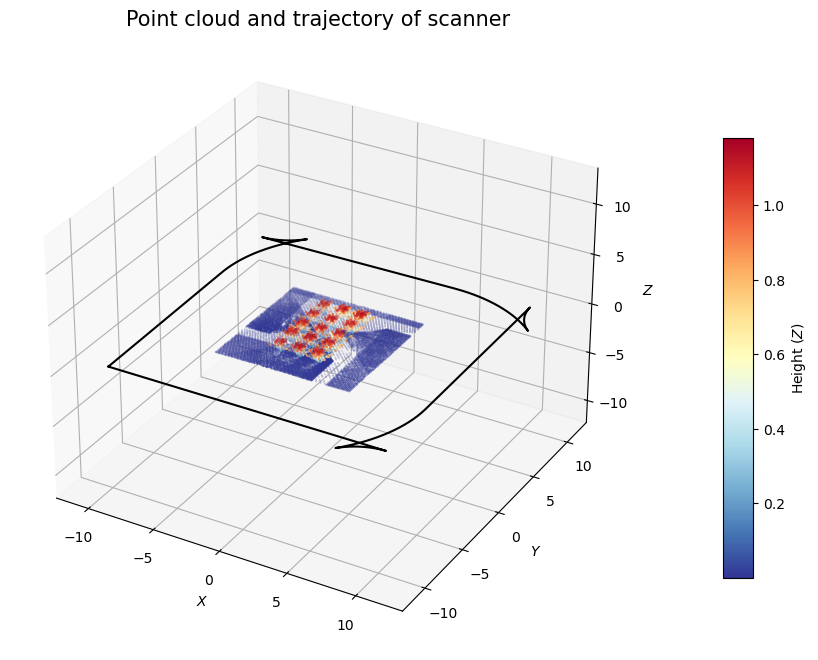

In [31]:
# Matplotlib figure.
fig = plt.figure(figsize=(12,8))
# Axes3d axis onto mpl figure.
ax = fig.add_subplot(projection='3d')

# create scene subset
bbox = [-5, -5, 0, 5, 5, 1.5]

strip_1_sub = extract_by_bb(strip_1, bbox)
strip_2_sub = extract_by_bb(strip_2, bbox)
strip_3_sub = extract_by_bb(strip_3, bbox)
strip_4_sub = extract_by_bb(strip_4, bbox)

# Scatter plot of points (coloured by height).
sc = ax.scatter(strip_1_sub[:, 0], strip_1_sub[:, 1], strip_1_sub[:, 2], c=strip_1_sub[:, 2], cmap="RdYlBu_r", s=0.02, label='scene')
sc = ax.scatter(strip_2_sub[:, 0], strip_2_sub[:, 1], strip_2_sub[:, 2], c=strip_2_sub[:, 2], cmap="RdYlBu_r", s=0.02, label='scene')
sc = ax.scatter(strip_3_sub[:, 0], strip_3_sub[:, 1], strip_3_sub[:, 2], c=strip_3_sub[:, 2], cmap="RdYlBu_r", s=0.02, label='scene')
sc = ax.scatter(strip_4_sub[:, 0], strip_4_sub[:, 1], strip_4_sub[:, 2], c=strip_4_sub[:, 2], cmap="RdYlBu_r", s=0.02, label='scene')

# Plot of trajectory.
ax.plot(traj[:,0], traj[:,1], traj[:,2], c = 'black', label = 'scanner trajectory')

cax = plt.axes([0.85, 0.2, 0.025, 0.55])

cbar = plt.colorbar(sc, cax=cax)

cbar.set_label("Height ($Z$)")

# Add axis labels.
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
ax.set_zlabel('$Z$')


set_axes_equal(ax)    

# Set title.
ax.set_title(label='Point cloud and trajectory of scanner',fontsize=15)
# Set subtitle.


# Display results
plt.show()